<center><img src="./images/logo_fmkn.png" width=300 style="display: inline-block;"></center> 

# Машинное обучение, МКН СПбГУ

### Третье домашнее задание (практическое). Решающие деревья


### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из `sklearn` для задачи классификации. Посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартной имплементацией из `sklearn`. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 14 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном сообщении условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через сайт emkn. Посылка должна содержать:
* Ноутбук `HW3_decision_trees_pr_Username.ipynb`. `Username` — ваша фамилия и имя на латинице именно в таком порядке
* Модуль `HW3_code.py`

В контест https://contest.yandex.ru/contest/28900 нужно отправить файл HW3_code.py с реализованными функциями и классами.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_circles, make_moons, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=127),
    make_moons(noise=0.2, random_state=127),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, 
                        class_sep=.8, random_state=127, n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

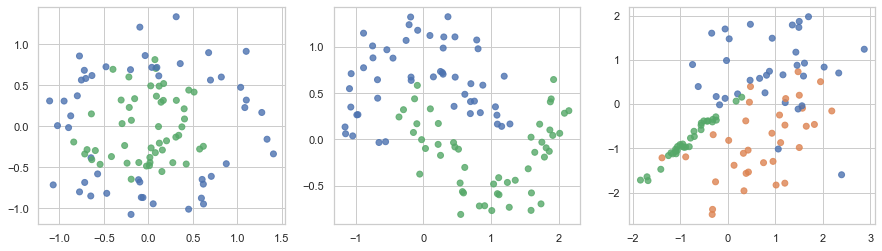

In [15]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (2 балла)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте `accuracy` на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [10]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.column_stack((xx.ravel(), yy.ravel())))
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

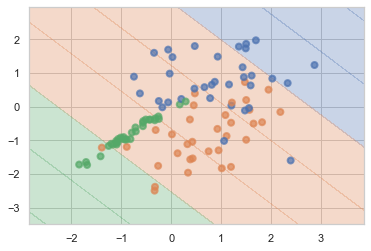

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

8
13
Dataset number 1 test score:0.8787878787878788
Dataset number 1 train score:1.0
6
8
Dataset number 2 test score:0.9696969696969697
Dataset number 2 train score:1.0
7
17
Dataset number 3 test score:0.8181818181818182
Dataset number 3 train score:1.0


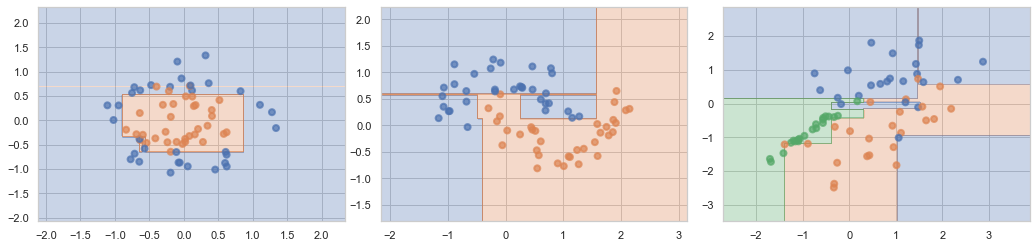

In [7]:
### your code here
plt.figure(figsize=(15, 4))
for i, (X, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=38)
    rc = DecisionTreeClassifier().fit(X_train, y_train)
    print(rc.get_depth())
    print(rc.get_n_leaves())
    print(f'{"Dataset number " + str(i + 1) + " test score:":20}{rc.score(X_test, y_test)}')
    print(f'{"Dataset number " + str(i + 1) + " train score:":20}{rc.score(X_train, y_train)}')
    plot_surface(rc, X_train, y_train)

На глаз переобучения нет.

__Ответ:__

__Задание 2. (2 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Dataset number 1, max_depth=0, min_samples_leaf=0 test score:0.8,train score:0.8875
Dataset number 1, max_depth=0, min_samples_leaf=1 test score:0.75,train score:0.825
Dataset number 1, max_depth=0, min_samples_leaf=2 test score:0.75,train score:0.825
Dataset number 1, max_depth=1, min_samples_leaf=0 test score:0.8,train score:0.8875
Dataset number 1, max_depth=1, min_samples_leaf=1 test score:0.75,train score:0.825
Dataset number 1, max_depth=1, min_samples_leaf=2 test score:0.75,train score:0.825
Dataset number 1, max_depth=2, min_samples_leaf=0 test score:0.8,train score:0.8875
Dataset number 1, max_depth=2, min_samples_leaf=1 test score:0.75,train score:0.825
Dataset number 1, max_depth=2, min_samples_leaf=2 test score:0.75,train score:0.825
Dataset number 2, max_depth=0, min_samples_leaf=0 test score:0.8,train score:0.8875
Dataset number 2, max_depth=0, min_samples_leaf=1 test score:0.75,train score:0.825
Dataset number 2, max_depth=0, min_samples_leaf=2 test score:0.75,train scor

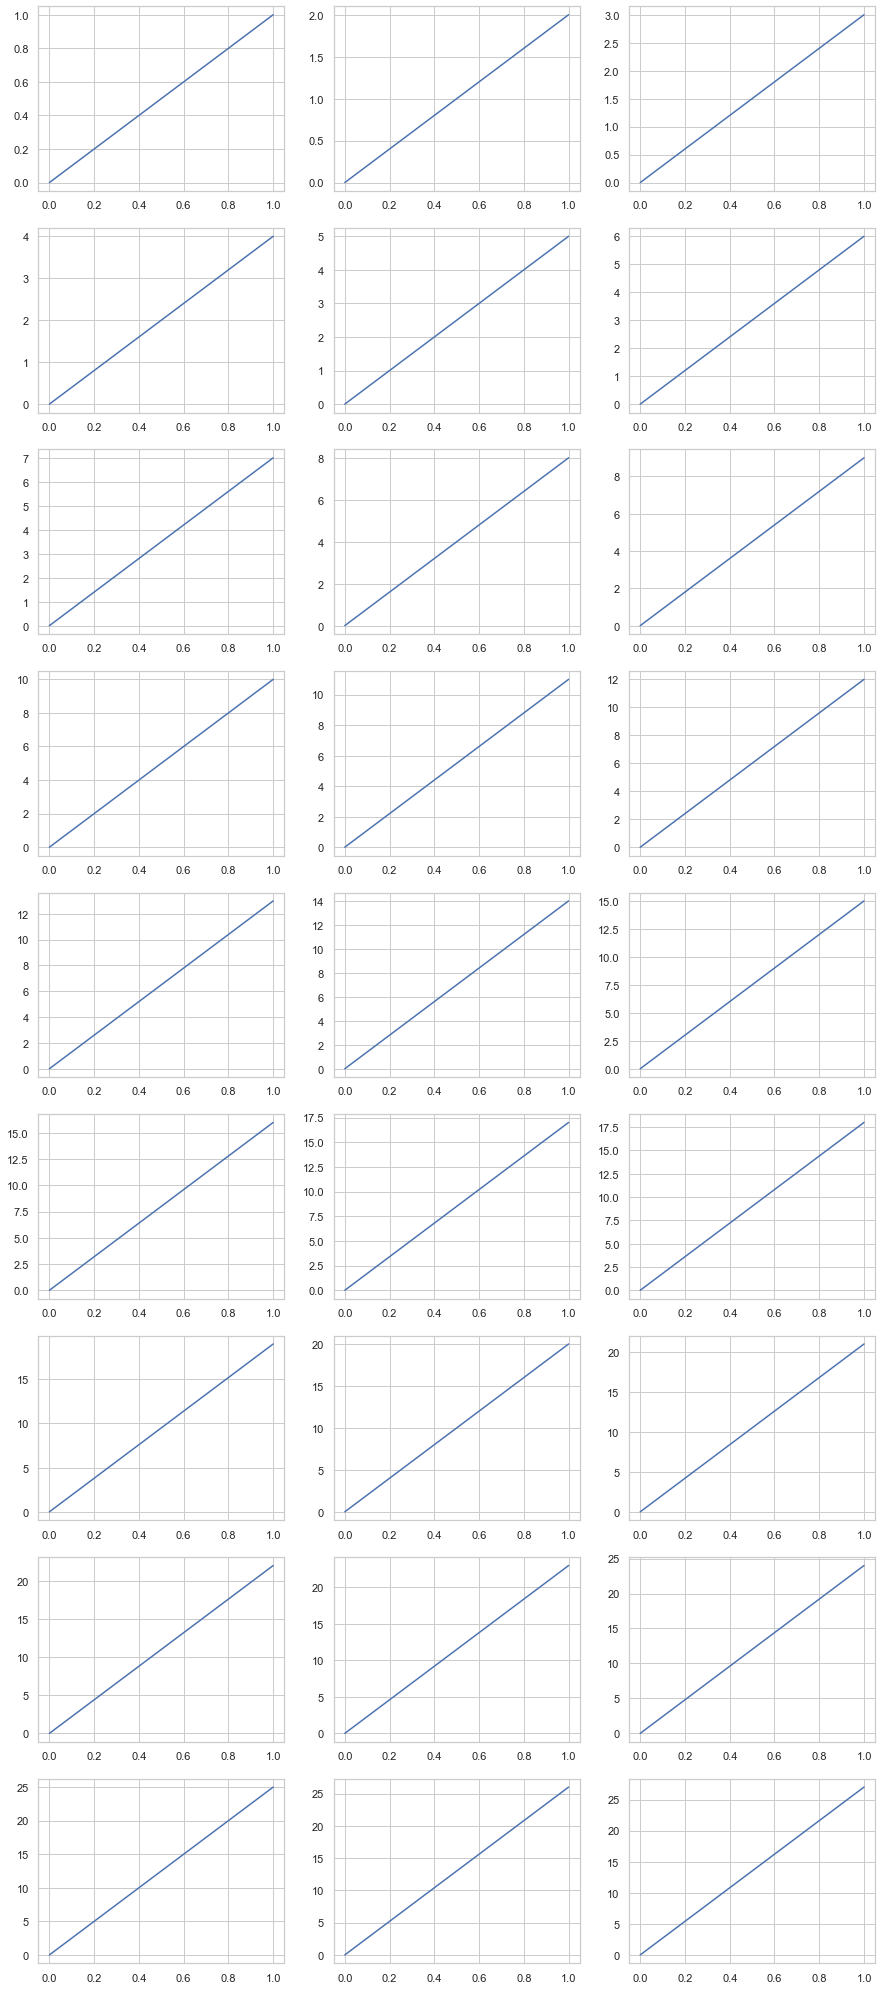

In [17]:
### your code here
from sklearn.model_selection import GridSearchCV

plt.figure(figsize=(15, 36))
parametrs = {'max_depth': [6, 7, 8], 'min_samples_leaf': [5, 10, 15]}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=38)
for i, (X, y) in enumerate(datasets):
    for d in range(3):
        for l in range(3):
            plt.subplot(9, 3, 1 + i * 9 + d * 3 + l)
            rc = DecisionTreeClassifier(max_depth=parametrs['max_depth'][d],
                                        min_samples_leaf=parametrs['min_samples_leaf'][l]).fit(X_train, y_train)
            print(f'{"Dataset number " + str(i + 1) + ", max_depth=" + str(d) + ", min_samples_leaf=" + str(l) + " test score:":40}{rc.score(X_test, y_test)}{",train score:":10}{rc.score(X_train, y_train)}')
            #plot_surface(rc, X_train, y_train)
            x = np.linspace(0, 1, 10)
            y = (1 + i * 9 + d * 3 + l) * x
            plt.plot(x, y)
    model = GridSearchCV(DecisionTreeClassifier(), parametrs)
    model.fit(X_train, y_train)
    model.best_estimator_.score(X_test, y_test)
    

__Ответ:__

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балла)__

Реализуйте функцию `find_best_split` из модуля `hw-3-code.py`

__Задание 4. (1 балл)__

Загрузите таблицу [students.csv](https://github.com/spbu-math-cs/ml-course-2021/blob/main/seminars/03_logic_methods/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [ ]:
### your code here

__Задание 5. (1 балл)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе `DecisionTree` модуля `hw-3-code.py`. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции Евгения Соколова (ВШЭ)](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. 

**Критерий останова**: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. 

**Ответ в листе**: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (1 балл)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно
1. скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), 
2. прочитать ее с помощью `pandas`, 
3. применить к каждому столбцу `LabelEncoder` (из `sklearn`), чтобы преобразовать строковые имена категорий в натуральные числа. 

Первый столбец — это целевая переменная (e — edible, p — poisonous). Мы будем измерять качество с помощью `accuracy`, так что нам не очень важно, что будет классом `1`, а что — классом `0`. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите `accuracy`.

У вас должно получиться значение `accuracy`, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
### your code here

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе `DecisionTree` поддержку параметров `max_depth`, `min_samples_split` и `min_samples_leaf` по аналогии с `DecisionTreeClassifier`. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что `pandas` умеет загружать файлы по `url`, в нашем случае это файл `\*.data`), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (они записаны в `Data Folder`, в файле `*.names`): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав `LabelEncoder`. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [ ]:
### your code here

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания: